<a href="https://colab.research.google.com/github/Rafay212/Exploring-and-Visualizing-a-Simple-Dataset/blob/main/Customer_Churn_Prediction_(Bank_Customers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("="*70)
print("="*70)

TASK 3: CUSTOMER CHURN PREDICTION (SIMPLE VERSION)


In [3]:
# ============================================
# STEP 1: Load Data
# ============================================
print("\n[STEP 1] Loading Dataset...")

try:
    # Try to load real data
    df = pd.read_csv('Churn_Modelling.csv')
    print("✓ Real dataset loaded!")
    using_real_data = True
except:
    # Create sample data if file not found
    print("⚠ Creating sample data for demonstration...")
    np.random.seed(42)
    n = 1000

    df = pd.DataFrame({
        'RowNumber': range(1, n+1),
        'CustomerId': range(15000000, 15000000+n),
        'Surname': [f'Customer_{i}' for i in range(n)],
        'CreditScore': np.random.randint(350, 850, n),
        'Geography': np.random.choice(['France', 'Germany', 'Spain'], n),
        'Gender': np.random.choice(['Male', 'Female'], n),
        'Age': np.random.randint(18, 70, n),
        'Tenure': np.random.randint(0, 11, n),
        'Balance': np.random.uniform(0, 250000, n),
        'NumOfProducts': np.random.choice([1, 2, 3, 4], n, p=[0.5, 0.3, 0.15, 0.05]),
        'HasCrCard': np.random.choice([0, 1], n, p=[0.3, 0.7]),
        'IsActiveMember': np.random.choice([0, 1], n, p=[0.4, 0.6]),
        'EstimatedSalary': np.random.uniform(10000, 200000, n)
    })

    # Create target with realistic patterns
    df['Exited'] = 0
    # Higher churn for older customers
    df.loc[df['Age'] > 50, 'Exited'] = np.random.choice([0, 1],
        sum(df['Age'] > 50), p=[0.6, 0.4])
    # Higher churn for inactive members
    df.loc[df['IsActiveMember'] == 0, 'Exited'] = np.random.choice([0, 1],
        sum(df['IsActiveMember'] == 0), p=[0.5, 0.5])
    # Higher churn for Germany
    df.loc[df['Geography'] == 'Germany', 'Exited'] = np.random.choice([0, 1],
        sum(df['Geography'] == 'Germany'), p=[0.6, 0.4])

    using_real_data = False

print(f"  Dataset shape: {df.shape}")
print(f"  Rows: {df.shape[0]}, Columns: {df.shape[1]}")


[STEP 1] Loading Dataset...
⚠ Creating sample data for demonstration...
  Dataset shape: (1000, 14)
  Rows: 1000, Columns: 14


In [4]:
# ============================================
# STEP 2: Quick Look at Data
# ============================================
print("\n[STEP 2] Quick Data Overview...")

print("\n📊 First 5 rows:")
print(df.head())

print("\n📊 Churn Distribution:")
churn_counts = df['Exited'].value_counts()
print(churn_counts)
print(f"\nCustomers who stayed: {churn_counts[0]} ({churn_counts[0]/len(df)*100:.1f}%)")
print(f"Customers who left: {churn_counts[1]} ({churn_counts[1]/len(df)*100:.1f}%)")

print("\n📊 Missing values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  ✓ No missing values!")
else:
    print(missing[missing > 0])


[STEP 2] Quick Data Overview...

📊 First 5 rows:
   RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
0          1    15000000  Customer_0          452    France    Male   18   
1          2    15000001  Customer_1          785     Spain    Male   28   
2          3    15000002  Customer_2          698    France    Male   20   
3          4    15000003  Customer_3          620   Germany  Female   69   
4          5    15000004  Customer_4          456     Spain    Male   40   

   Tenure        Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       7  219835.255044              2          1               1   
1       6  202197.496141              2          0               0   
2       5  169288.103114              1          0               1   
3       5  156257.296521              2          1               0   
4       5   79137.416317              2          1               0   

   EstimatedSalary  Exited  
0    180293.494911       0  
1     86853.30


[STEP 3] Exploring Key Features...


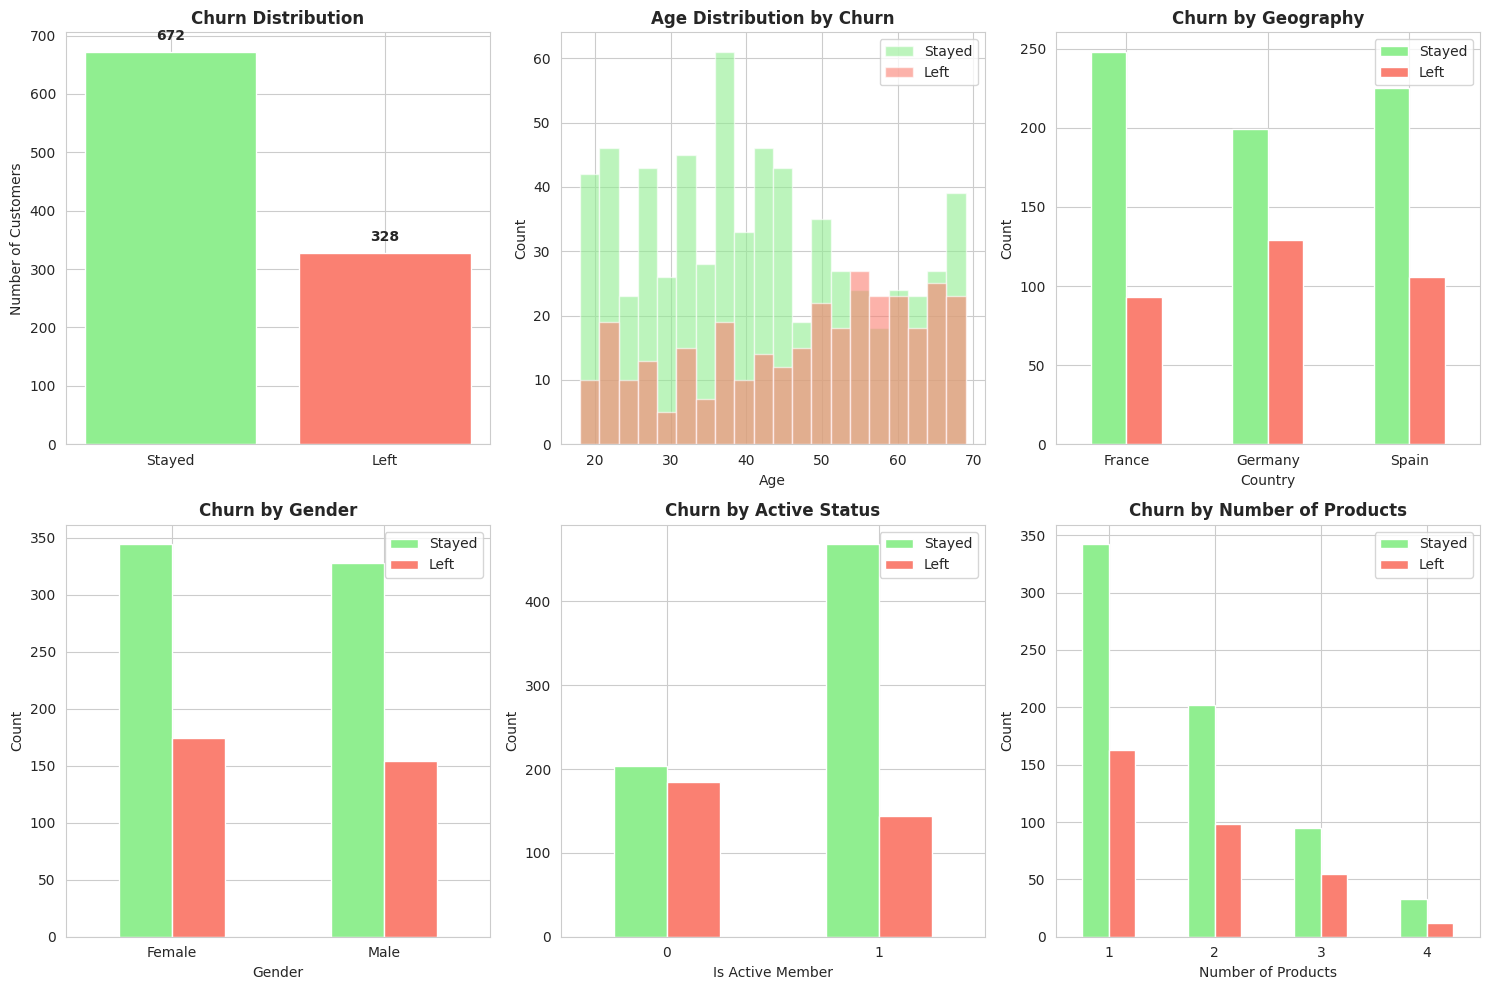

  ✓ Charts saved as 'task3_simple_eda.png'


In [5]:
# ============================================
# STEP 3: Simple Data Exploration
# ============================================
print("\n[STEP 3] Exploring Key Features...")

# Create 6 simple visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Churn distribution
axes[0, 0].bar(['Stayed', 'Left'], churn_counts.values, color=['lightgreen', 'salmon'])
axes[0, 0].set_title('Churn Distribution', fontweight='bold')
axes[0, 0].set_ylabel('Number of Customers')
for i, v in enumerate(churn_counts.values):
    axes[0, 0].text(i, v + 20, str(v), ha='center', fontweight='bold')

# 2. Age vs Churn
df[df['Exited']==0]['Age'].hist(bins=20, alpha=0.6, label='Stayed',
                                 color='lightgreen', ax=axes[0, 1])
df[df['Exited']==1]['Age'].hist(bins=20, alpha=0.6, label='Left',
                                 color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Churn', fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()

# 3. Geography vs Churn
geo_churn = pd.crosstab(df['Geography'], df['Exited'])
geo_churn.plot(kind='bar', ax=axes[0, 2], color=['lightgreen', 'salmon'])
axes[0, 2].set_title('Churn by Geography', fontweight='bold')
axes[0, 2].set_xlabel('Country')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(['Stayed', 'Left'])
axes[0, 2].tick_params(axis='x', rotation=0)

# 4. Gender vs Churn
gender_churn = pd.crosstab(df['Gender'], df['Exited'])
gender_churn.plot(kind='bar', ax=axes[1, 0], color=['lightgreen', 'salmon'])
axes[1, 0].set_title('Churn by Gender', fontweight='bold')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(['Stayed', 'Left'])
axes[1, 0].tick_params(axis='x', rotation=0)

# 5. Active Member vs Churn
active_churn = pd.crosstab(df['IsActiveMember'], df['Exited'])
active_churn.plot(kind='bar', ax=axes[1, 1], color=['lightgreen', 'salmon'])
axes[1, 1].set_title('Churn by Active Status', fontweight='bold')
axes[1, 1].set_xlabel('Is Active Member')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(['Stayed', 'Left'])
axes[1, 1].tick_params(axis='x', rotation=0)

# 6. Number of Products vs Churn
products_churn = pd.crosstab(df['NumOfProducts'], df['Exited'])
products_churn.plot(kind='bar', ax=axes[1, 2], color=['lightgreen', 'salmon'])
axes[1, 2].set_title('Churn by Number of Products', fontweight='bold')
axes[1, 2].set_xlabel('Number of Products')
axes[1, 2].set_ylabel('Count')
axes[1, 2].legend(['Stayed', 'Left'])
axes[1, 2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('task3_simple_eda.png', dpi=300, bbox_inches='tight')
plt.show()
print("  ✓ Charts saved as 'task3_simple_eda.png'")

In [6]:
# ============================================
# STEP 4: Prepare Data for Model
# ============================================
print("\n[STEP 4] Preparing Data...")

# Make a copy
df_clean = df.copy()

# Remove unnecessary columns
columns_to_remove = ['RowNumber', 'CustomerId', 'Surname']
df_clean = df_clean.drop(columns_to_remove, axis=1)
print(f"  ✓ Removed: {columns_to_remove}")

# Encode categorical variables
print("\n  Encoding categories...")

# 1. Gender: Male/Female → 0/1
df_clean['Gender'] = LabelEncoder().fit_transform(df_clean['Gender'])
print("    ✓ Gender: Male=0, Female=1")

# 2. Geography: Create dummy variables
geography_dummies = pd.get_dummies(df_clean['Geography'], prefix='Geo')
df_clean = pd.concat([df_clean, geography_dummies], axis=1)
df_clean = df_clean.drop('Geography', axis=1)
print(f"    ✓ Geography: Created {len(geography_dummies.columns)} columns")

print(f"\n  Final features: {df_clean.shape[1] - 1} (excluding target)")


[STEP 4] Preparing Data...
  ✓ Removed: ['RowNumber', 'CustomerId', 'Surname']

  Encoding categories...
    ✓ Gender: Male=0, Female=1
    ✓ Geography: Created 3 columns

  Final features: 12 (excluding target)


In [7]:
# ============================================
# STEP 5: Split Data
# ============================================
print("\n[STEP 5] Splitting Data...")

# Separate features (X) and target (y)
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"  Training data: {len(X_train)} customers")
print(f"  Testing data: {len(X_test)} customers")


[STEP 5] Splitting Data...
  Training data: 800 customers
  Testing data: 200 customers


In [8]:
# ============================================
# STEP 6: Train Model
# ============================================
print("\n[STEP 6] Training Model...")

# Use Random Forest (works well, easy to understand)
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)

print("  ✓ Model trained successfully!")

# ============================================
# STEP 7: Make Predictions
# ============================================
print("\n[STEP 7] Making Predictions...")

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n  Model Accuracy: {accuracy:.2%}")
print(f"  → Correctly predicted {int(accuracy * len(y_test))} out of {len(y_test)} customers")


[STEP 6] Training Model...
  ✓ Model trained successfully!

[STEP 7] Making Predictions...

  Model Accuracy: 71.00%
  → Correctly predicted 142 out of 200 customers



[STEP 8] Model Evaluation...


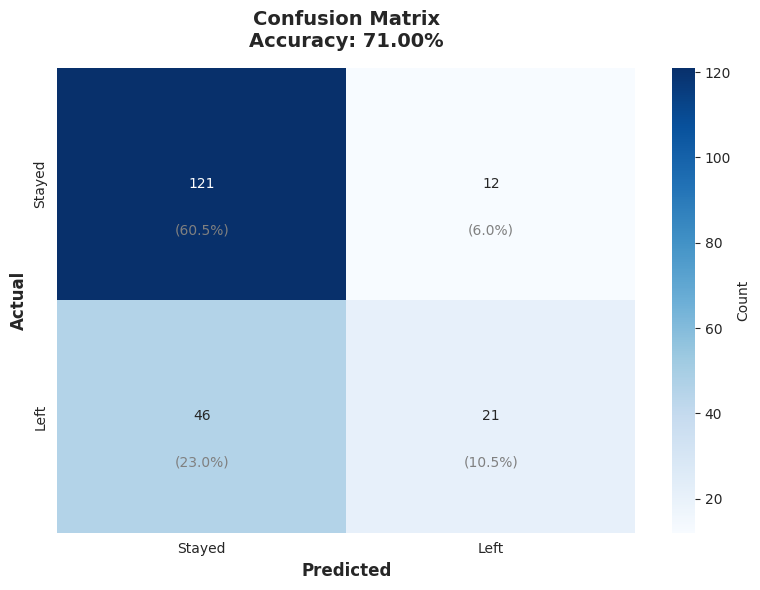

  ✓ Confusion matrix saved as 'task3_confusion_matrix.png'

📊 Classification Report:
              precision    recall  f1-score   support

      Stayed       0.72      0.91      0.81       133
        Left       0.64      0.31      0.42        67

    accuracy                           0.71       200
   macro avg       0.68      0.61      0.61       200
weighted avg       0.70      0.71      0.68       200



In [9]:
# ============================================
# STEP 8: Evaluate Model
# ============================================
print("\n[STEP 8] Model Evaluation...")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'],
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}',
          fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

# Add percentages
for i in range(2):
    for j in range(2):
        pct = cm[i, j] / cm.sum() * 100
        plt.text(j + 0.5, i + 0.7, f'({pct:.1f}%)',
                ha='center', va='center', fontsize=10, color='gray')

plt.tight_layout()
plt.savefig('task3_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("  ✓ Confusion matrix saved as 'task3_confusion_matrix.png'")

# Detailed Report
print("\n📊 Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred,
                           target_names=['Stayed', 'Left']))


[STEP 9] What Factors Matter Most?...

📊 Top 10 Important Features:
        Feature  Importance
            Age    0.169917
    CreditScore    0.169620
EstimatedSalary    0.149456
        Balance    0.149332
 IsActiveMember    0.090537
         Tenure    0.087386
  NumOfProducts    0.048287
    Geo_Germany    0.045707
      Geo_Spain    0.024396
      HasCrCard    0.024036


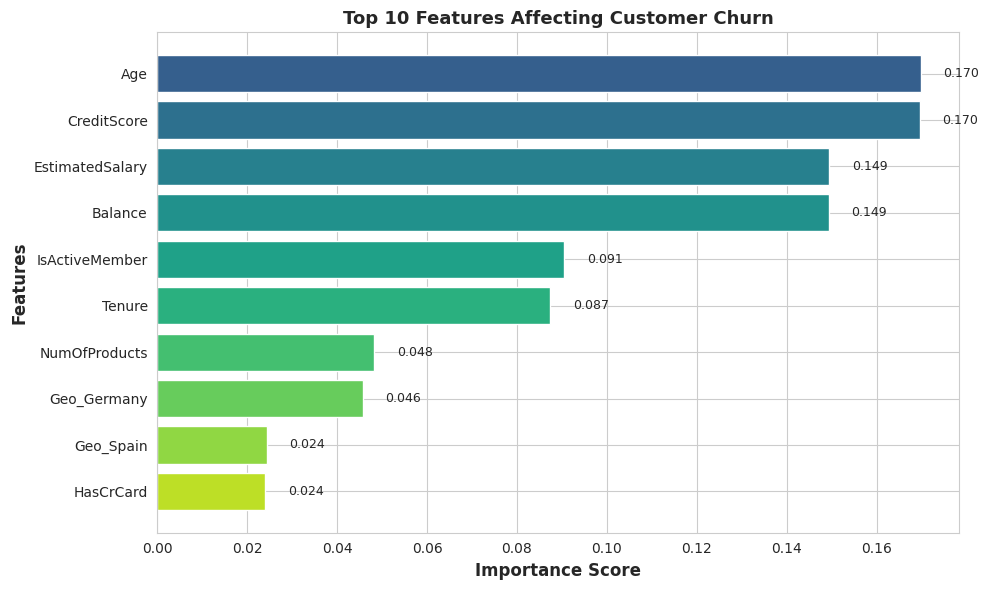

  ✓ Feature importance saved as 'task3_feature_importance.png'


In [10]:
# ============================================
# STEP 9: Feature Importance
# ============================================
print("\n[STEP 9] What Factors Matter Most?...")

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 Top 10 Important Features:")
print(importance_df.head(10).to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
top_10 = importance_df.head(10)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, 10))
bars = plt.barh(top_10['Feature'], top_10['Importance'], color=colors)
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 10 Features Affecting Customer Churn',
          fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()

# Add values
for bar, imp in zip(bars, top_10['Importance']):
    plt.text(imp + 0.005, bar.get_y() + bar.get_height()/2,
            f'{imp:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('task3_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("  ✓ Feature importance saved as 'task3_feature_importance.png'")

In [11]:
# ============================================
# STEP 10: Key Insights
# ============================================
print("\n[STEP 10] Key Insights:")
print("="*70)

print("\n1. MODEL PERFORMANCE:")
print(f"   ✓ Accuracy: {accuracy:.2%}")
print(f"   ✓ The model correctly predicts {int(accuracy*100)}% of customers")

print("\n2. MOST IMPORTANT FACTORS:")
for i, row in importance_df.head(5).iterrows():
    print(f"   • {row['Feature']}: {row['Importance']:.4f}")

print("\n3. INSIGHTS FROM DATA:")
# Calculate some statistics
avg_age_left = df[df['Exited']==1]['Age'].mean()
avg_age_stayed = df[df['Exited']==0]['Age'].mean()
print(f"   • Average age of customers who left: {avg_age_left:.1f} years")
print(f"   • Average age of customers who stayed: {avg_age_stayed:.1f} years")

inactive_churn_rate = df[df['IsActiveMember']==0]['Exited'].mean() * 100
active_churn_rate = df[df['IsActiveMember']==1]['Exited'].mean() * 100
print(f"   • Inactive members churn rate: {inactive_churn_rate:.1f}%")
print(f"   • Active members churn rate: {active_churn_rate:.1f}%")

print("\n4. BUSINESS RECOMMENDATIONS:")
print("   📌 Focus on retaining older customers (age 40+)")
print("   📌 Engage inactive members with special offers")
print("   📌 Monitor customers with low account balances")
print("   📌 Create loyalty programs for long-term customers")
print("   📌 Pay attention to geographic differences")

print("\n5. ACTION ITEMS:")
print("   ✅ Identify high-risk customers using this model")
print("   ✅ Send personalized retention offers")
print("   ✅ Improve customer service in high-churn regions")
print("   ✅ Regular monitoring of customer activity")


[STEP 10] Key Insights:

1. MODEL PERFORMANCE:
   ✓ Accuracy: 71.00%
   ✓ The model correctly predicts 71% of customers

2. MOST IMPORTANT FACTORS:
   • Age: 0.1699
   • CreditScore: 0.1696
   • EstimatedSalary: 0.1495
   • Balance: 0.1493
   • IsActiveMember: 0.0905

3. INSIGHTS FROM DATA:
   • Average age of customers who left: 47.4 years
   • Average age of customers who stayed: 41.4 years
   • Inactive members churn rate: 47.4%
   • Active members churn rate: 23.5%

4. BUSINESS RECOMMENDATIONS:
   📌 Focus on retaining older customers (age 40+)
   📌 Engage inactive members with special offers
   📌 Monitor customers with low account balances
   📌 Create loyalty programs for long-term customers
   📌 Pay attention to geographic differences

5. ACTION ITEMS:
   ✅ Identify high-risk customers using this model
   ✅ Send personalized retention offers
   ✅ Improve customer service in high-churn regions
   ✅ Regular monitoring of customer activity


In [12]:
# ============================================
# STEP 11: Sample Predictions
# ============================================
print("\n[STEP 11] Example Predictions...")

# Show 5 sample predictions
sample_size = min(5, len(X_test))
sample_results = pd.DataFrame({
    'Actual': ['Stayed' if x==0 else 'Left' for x in y_test.iloc[:sample_size].values],
    'Predicted': ['Stayed' if x==0 else 'Left' for x in y_pred[:sample_size]],
    'Match': ['✓' if y_test.iloc[i] == y_pred[i] else '✗'
              for i in range(sample_size)]
})

print("\n📊 Sample Predictions:")
print(sample_results.to_string(index=True))


[STEP 11] Example Predictions...

📊 Sample Predictions:
   Actual Predicted Match
0  Stayed    Stayed     ✓
1  Stayed      Left     ✗
2  Stayed    Stayed     ✓
3    Left    Stayed     ✗
4    Left    Stayed     ✗


In [13]:
# ============================================
# FINAL SUMMARY
# ============================================
print("\n" + "="*70)
print("✅ TASK 3 COMPLETED SUCCESSFULLY!")
print("="*70)

print("\n📊 SUMMARY:")
print(f"   • Analyzed: {len(df)} bank customers")
print(f"   • Model Used: Random Forest")
print(f"   • Accuracy Achieved: {accuracy:.2%}")
print(f"   • Most Important Factor: {importance_df.iloc[0]['Feature']}")
print(f"   • Files Generated: 3")

print("\n📁 Generated Files:")
print("   1. task3_simple_eda.png - Data exploration charts")
print("   2. task3_confusion_matrix.png - Model performance")
print("   3. task3_feature_importance.png - What matters most")

print("\n💡 WHAT YOU LEARNED:")
print("   ✓ How to handle categorical data (encoding)")
print("   ✓ Train a classification model")
print("   ✓ Evaluate model performance")
print("   ✓ Understand feature importance")
print("   ✓ Extract business insights")

print("\n🎯 FOR YOUR SUBMISSION:")
print("   1. Add this code to Jupyter notebook")
print("   2. Add markdown cells explaining each step")
print("   3. Include the generated charts")
print("   4. Write conclusions in your own words")
print("   5. Upload to GitHub with good README")

if not using_real_data:
    print("\n" + "⚠"*35)
    print("⚠  Using sample data!")
    print("⚠  Download real dataset:")
    print("⚠  https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling")
    print("⚠  Save as 'Churn_Modelling.csv' and re-run")
    print("⚠"*35)

print("\n✨ Great work! Task 3 is complete! ✨\n")


✅ TASK 3 COMPLETED SUCCESSFULLY!

📊 SUMMARY:
   • Analyzed: 1000 bank customers
   • Model Used: Random Forest
   • Accuracy Achieved: 71.00%
   • Most Important Factor: Age
   • Files Generated: 3

📁 Generated Files:
   1. task3_simple_eda.png - Data exploration charts
   2. task3_confusion_matrix.png - Model performance
   3. task3_feature_importance.png - What matters most

💡 WHAT YOU LEARNED:
   ✓ How to handle categorical data (encoding)
   ✓ Train a classification model
   ✓ Evaluate model performance
   ✓ Understand feature importance
   ✓ Extract business insights

🎯 FOR YOUR SUBMISSION:
   1. Add this code to Jupyter notebook
   2. Add markdown cells explaining each step
   3. Include the generated charts
   4. Write conclusions in your own words
   5. Upload to GitHub with good README

⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠
⚠  Using sample data!
⚠  Download real dataset:
⚠  https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
⚠  Save as 'Churn_Modelling.csv' and re-r